In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from arch import arch_model

from var_es_toolbox.data import load_data
from var_es_toolbox.models import forecast_ugarch

In [2]:
project_dir = Path.cwd().parent
data_dir = project_dir / "data"
data_cleaned_name = "data_cleaned.csv"
date_format = "%Y-%m-%d"

data_cleaned = load_data(data_dir / data_cleaned_name, date_format=date_format)
futures_returns = data_cleaned.iloc[:, 1]

In [3]:
p = 1
q = 1
n = 5
mean = "constant"
vol = "garch"
dist = "normal"

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8044.994024789834
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5653.385604114175
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5536.3663900436495
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5500.381058325348
Iteration:      5,   Func. Count:     32,   Neg. LLF: 5500.0358593756655
Iteration:      6,   Func. Count:     37,   Neg. LLF: 5500.0345381564675
Iteration:      7,   Func. Count:     42,   Neg. LLF: 5500.03431681925
Iteration:      8,   Func. Count:     47,   Neg. LLF: 5500.032909096174
Iteration:      9,   Func. Count:     52,   Neg. LLF: 5500.025053903846
Iteration:     10,   Func. Count:     57,   Neg. LLF: 5499.982435231593
Iteration:     11,   Func. Count:     62,   Neg. LLF: 5499.742483227303
Iteration:     12,   Func. Count:     67,   Neg. LLF: 5498.292561141108
Iteration:     13,   Func. Count:     72,   Neg. LLF: 5497.701089804879
Iteration:     14,   Func. Count:     77,   Neg. LLF: 5497.707

[Text(0.5, 1.0, 'Distribution of Standardized Residuals')]

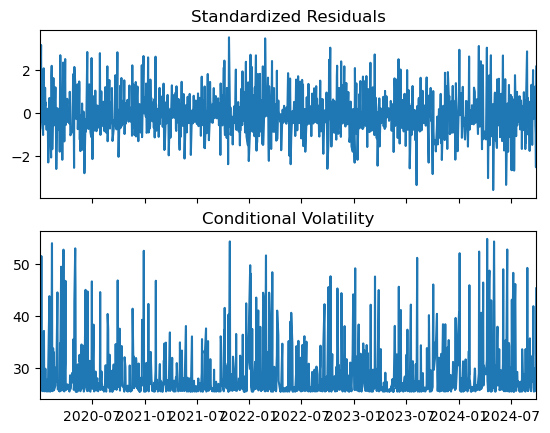

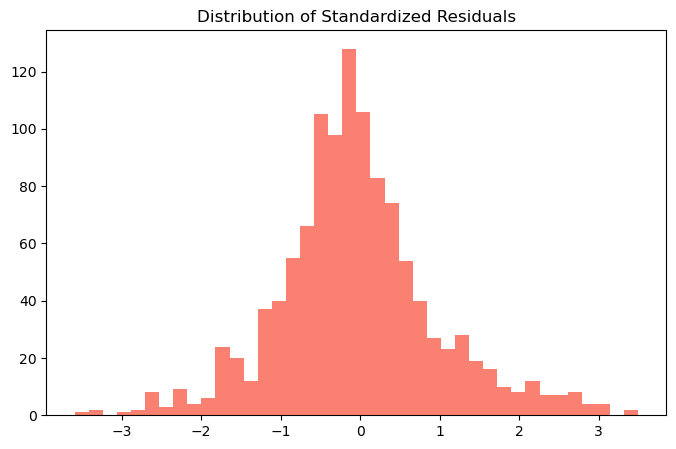

In [4]:
basic_gm = arch_model(futures_returns, p=p, q=q, mean=mean, vol=vol, dist=dist)

gm_result = basic_gm.fit()
print(gm_result.summary())
gm_result.plot()

# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon=n)

# Print the forecast variance
print(gm_forecast.variance[-1:])

# Calculate standardized residual
gm_std_resid = gm_result.resid / gm_result.conditional_volatility

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(gm_std_resid, color='salmon', bins=40)
ax.set(title='Distribution of Standardized Residuals')

In [5]:
forecast_garch_result = forecast_ugarch(futures_returns, p=p, q=q, n=n, verbose=0, mean=mean, dist=dist)
print(forecast_garch_result.variance)

                    h.1          h.2          h.3         h.4         h.5
Date                                                                     
2024-09-27  3098.659757  1457.084132  1027.903539  915.696718  886.360884


In [6]:
from scripts.activate_renv import activate_renv

activate_renv()

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython
pandas2ri.activate()

- renv activated -- please restart the R session.
[1] "C:/Users/chris/AppData/Local/R/win-library/4.4"     
[2] "C:/Users/chris/Anaconda/envs/var-es-r/lib/R/library"
[1] "C:/Users/chris/PycharmProjects/renv/library/windows/R-4.4/x86_64-w64-mingw32"
[2] "C:/Users/chris/Anaconda/envs/var-es-r/lib/R/library"                         


C:\Users\chris\Anaconda\envs\var-es\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [7]:
models_dir = project_dir / "src" / "var_es_toolbox" / "backtesting"
r_backtesting_path = models_dir /  "r_backtesting.R"
print(r_backtesting_path)
robjects.globalenv['r_backtesting_path'] = str(r_backtesting_path)
# robjects.r.source(str(r_models_path))

robjects.r('''
print(.libPaths())
lib_dir <- renv::paths$library(project = project_dir)
.libPaths(lib_dir)
print(.libPaths())
source(r_backtesting_path)
''')

backtest_er = robjects.r["backtest_er"]
backtest_er_result = backtest_er([0.1], [5], [4.5], [30], 1000)

C:\Users\chris\PycharmProjects\var-es-toolbox\src\var_es_toolbox\backtesting\r_backtesting.R
[1] "C:/Users/chris/PycharmProjects/renv/library/windows/R-4.4/x86_64-w64-mingw32"
[2] "C:/Users/chris/Anaconda/envs/var-es-r/lib/R/library"                         
[1] "C:/Users/chris/PycharmProjects/renv/library/windows/R-4.4/x86_64-w64-mingw32"
[2] "C:/Users/chris/Anaconda/envs/var-es-r/lib/R/library"                         


R[write to console]: Error in library(esback) : there is no package called 'esback'



RRuntimeError: Error in library(esback) : there is no package called 'esback'


In [ ]:
p = 1
q = 1
n = 5

In [ ]:
robjects.globalenv['df'] = pandas2ri.py2rpy(futures_returns.reset_index())
robjects.globalenv['p'] = p
robjects.globalenv['q'] = q
robjects.globalenv['n'] = n

In [ ]:
models_dir = project_dir / "src" / "var_es_toolbox" / "models"
r_models_path = models_dir /  "r_models.R"
robjects.globalenv['r_models_path'] = str(r_models_path)

robjects.r.source(str(r_models_path))
forecast_ugarch_r = robjects.r["forecast_ugarch"]
forecast_ugarch_result_r = forecast_ugarch_r(futures_returns, p, q, n)
print(forecast_ugarch_result_r)

In [ ]:
%%R

print(renv::paths)
source(r_path)
result <- forecast_ugarch(df, p, q, n)
print(result)

In [ ]:
%%R

library(ggplot2)
ggplot(df, aes(x=`Date`, y=`NPE EDEFB D1 - return`)) +
    geom_point(color="blue") +
    ggtitle("NPE EDEFB D1 Returns") +
    xlab("Date") +
    ylab("Return (%)")